## **Academic Honesty**
This assignment must be done individually and independently. You must implement the whole assignment by yourself. Academic dishonesty is not tolerated.

## **Requirements**

1.   When you work on this assignment, you should make a copy of this notebook in Google Colab. This can be done using the option `File > Save a copy in Drive` in Google Colab.
2.   You should fill in your answer for each task inside the code block right under the task.
3.   You should only insert your code into the designated code blocks, as mentioned above. Other than that, you shouldn't change anything else in the notebook.


4.   You may not use any other imports to solve the tasks. In other words, you shouldn't use `import` in any designated code blocks for the tasks.
5.   Even if you can only partially solve a task, you should include your code in the code block, which allows us to consider partial credit.
6.   However, your code should not raise errors. Any code raising errors will not get partial credit.
7.   HotelCustomersDataset.xlsx is the files that  will be used in the assigment1.
8.   To submit your assignment, download your Colab into a .ipynb file. This can be done using the option `Download > Download .ipynb` in Google Colab.
9.   Submit the downloaded .ipynb file in Canvas.


In [111]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [112]:
hotels = pd.read_excel("HotelCustomersDataset.xlsx")

hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64")

In [113]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


# Task1: Plotting DataFrames

* Plot the `LodgingRevenue` and `OtherRevenue` columns in a line chart from the `monthly_revenue` DataFrame created below.  
* Make sure your x-axis is the `date` column.

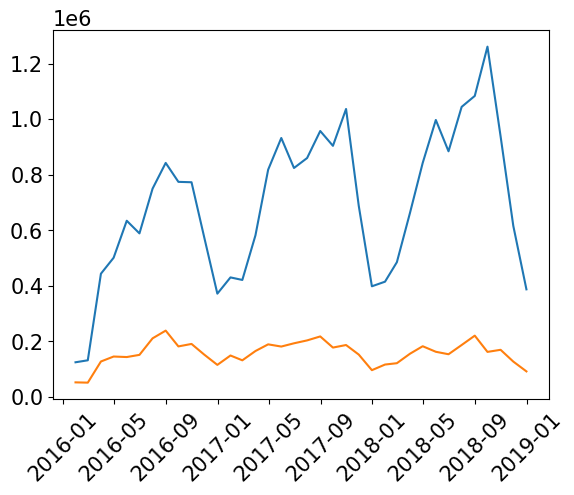

In [114]:
daily_revenue = hotels.groupby("date").agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})

monthly_revenue = daily_revenue.resample("M").sum()

monthly_revenue.head()

logistic_revenue = monthly_revenue['LodgingRevenue']
other_revenue = monthly_revenue['OtherRevenue']

plt.plot(monthly_revenue.index, logistic_revenue)
plt.plot(monthly_revenue.index, other_revenue)

plt.xticks(rotation=45)
plt.show()

# Task 2: Formatted Line Chart

Plot the monthly sum of `LodgingRevenue` and `OtherRevenue`.

Make sure to add titles and a y-axis label, remove the top and right borders, and add a legend.

Consider modifying the font sizes as well.



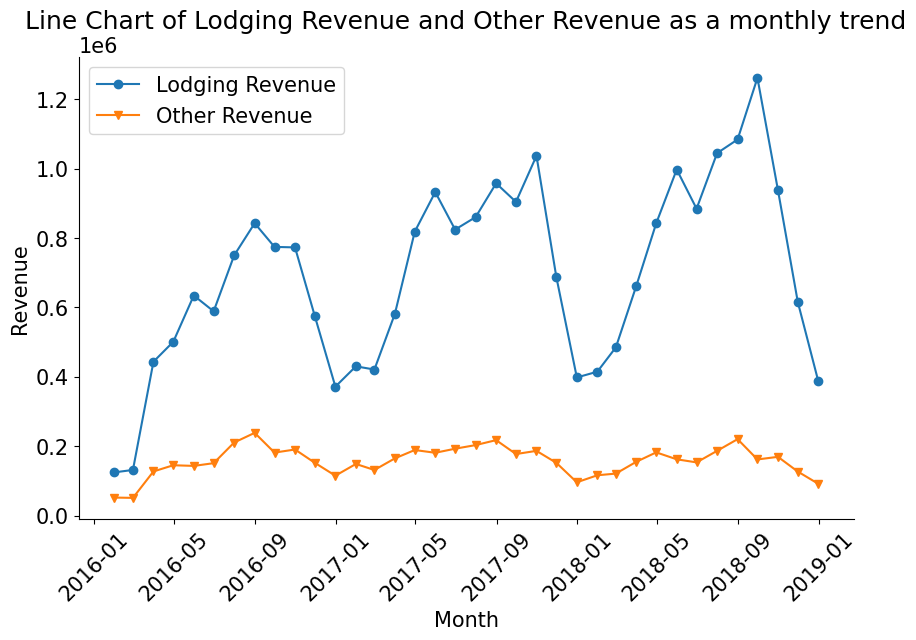

In [115]:
plt.figure(figsize=(10, 6))

# Changing the font size
plt.rc('font', size=15)

# Plotting 'LodgingRevenue' on a line chart
plt.plot(monthly_revenue.index, monthly_revenue['LodgingRevenue'], label='Lodging Revenue', marker='o')

# Plotting 'OtherRevenue' on a line chart
plt.plot(monthly_revenue.index, monthly_revenue['OtherRevenue'], label='Other Revenue', marker='v')

plt.title('Line Chart of Lodging Revenue and Other Revenue as a monthly trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Remove the top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

# Task 3: Dual Axis Line Chart

* Plot the sum of nights booked and the sum of cancellations on a quarterly basis (resample("Q") will help).

* Plot them in the same chart but different Y-Axes.

* Make sure to add titles and axis labels, remove scientific notation, and add a legend.

* Consider modifying the font sizes as well.



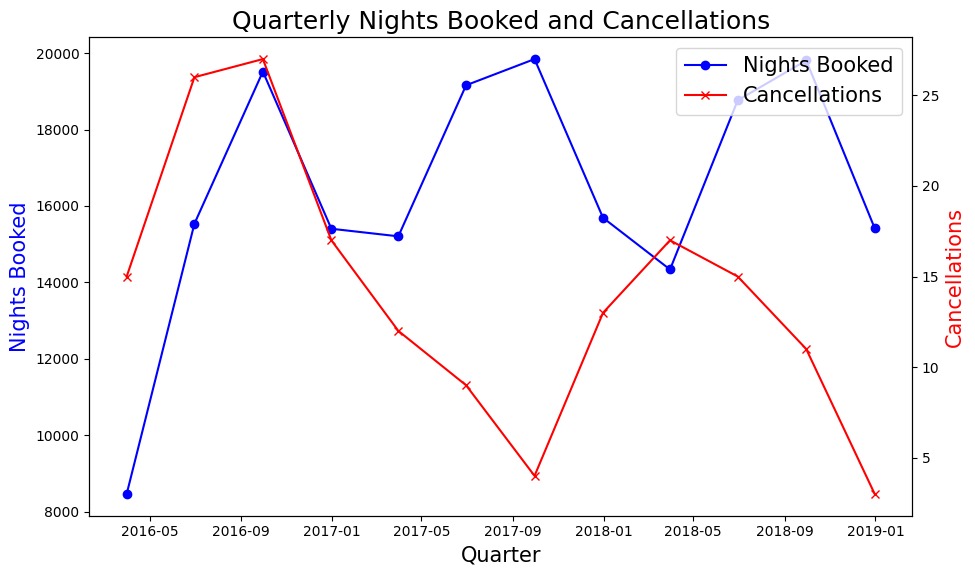

In [116]:
hotels['Dates'] = pd.to_datetime(hotels['date'])
hotels.set_index('Dates', inplace=True)

# Resample data on a quarterly basis and calculate the sum
quarterly_data = hotels.resample('Q').sum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the sum of nights booked
ax1.plot(quarterly_data.index, quarterly_data['RoomNights'], label='Nights Booked', color='b', marker='o')

# Set axis labels and title
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Nights Booked', color='b')
ax1.set_title('Quarterly Nights Booked and Cancellations')

ax2 = ax1.twinx()

# Plot the sum of cancellations
ax2.plot(quarterly_data.index, quarterly_data['BookingsCanceled'], label='Cancellations', color='r', marker='x')
ax2.set_ylabel('Cancellations', color='r')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Remove scientific notation on the Y-axis
ax1.get_yaxis().get_major_formatter().set_scientific(False)
ax2.get_yaxis().get_major_formatter().set_scientific(False)

# Modify font sizes
ax1.tick_params(axis='both', labelsize=10)
ax2.tick_params(axis='both', labelsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# Task4: Bar Chart

* Create a bar chart of total room nights booked by country. Limit your results to the top 10 countries.

* Then, build a horizontal bar chart of lodging revenue by country for the same countries in your room nights chart.

* As always, make sure to add labels to your chart!

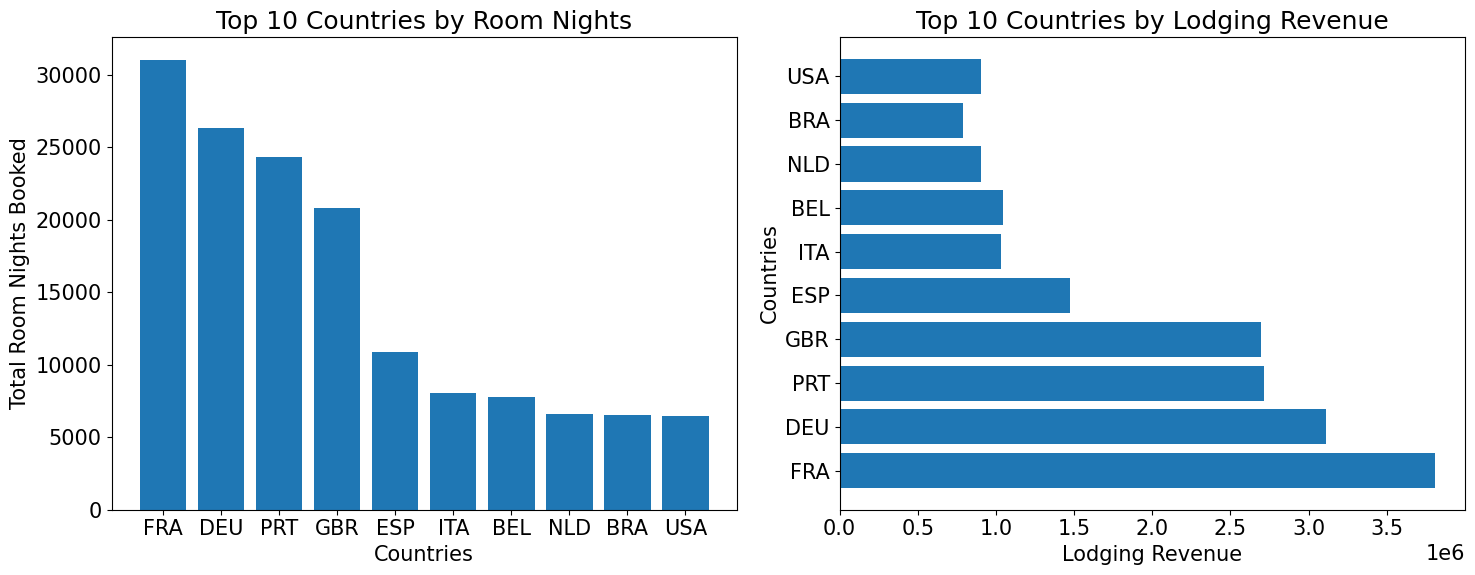

In [117]:
#Aggregating the room nights and lodging revenue after grouping by each country
country_aggregate = hotels.groupby("Nationality").agg({"RoomNights":"sum", "LodgingRevenue":"sum"})
#Sort in descending order by total room nights by country
country_aggregate = country_aggregate.sort_values(by=['RoomNights'],ascending=False)
country_aggregate.head(20)
# Limiting the results to top 10 countries
top_roomnights_countries = country_aggregate[:10]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# Vertical Bar chart for total room nights booked by country
axes[0].bar(top_roomnights_countries.index, top_roomnights_countries['RoomNights'])

axes[0].set_ylabel('Total Room Nights Booked')
axes[0].set_xlabel('Countries')
axes[0].set_title('Top 10 Countries by Room Nights')


# Horizontal bar chart for lodging revenue by country
axes[1].barh(top_roomnights_countries.index, top_roomnights_countries['LodgingRevenue'])
axes[1].set_xlabel('Lodging Revenue')
axes[1].set_ylabel('Countries')
axes[1].set_title('Top 10 Countries by Lodging Revenue')

plt.tight_layout()
plt.show()

# Task 5: Advanced Bar Charts

* Build a grouped bar chart of our top 5 countries with LodgingRevenue and OtherRevenue as bars for each.
* Then, build a 100% bar chart stacked bar chart of LodgingRevenue and OtherRevenue. Add a reference line at 80%, which is our baseline.



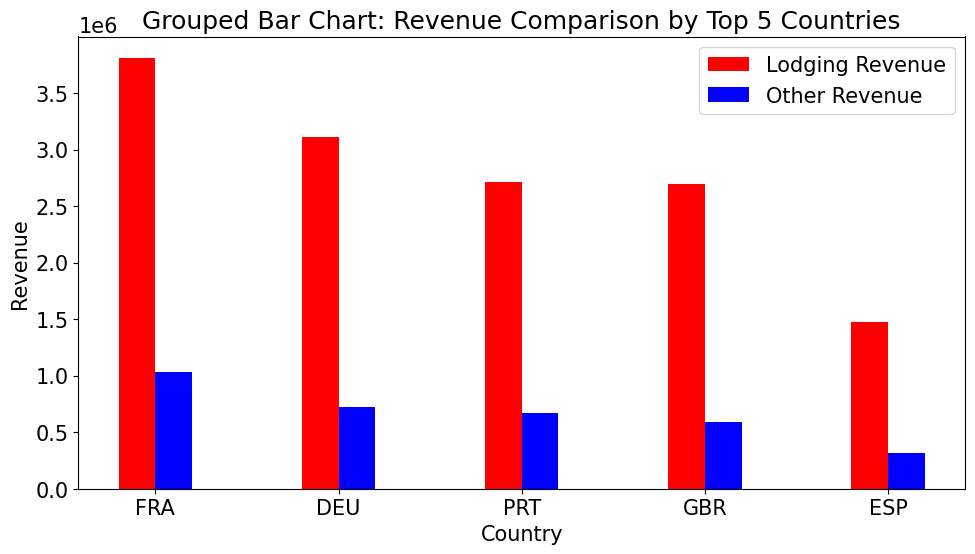

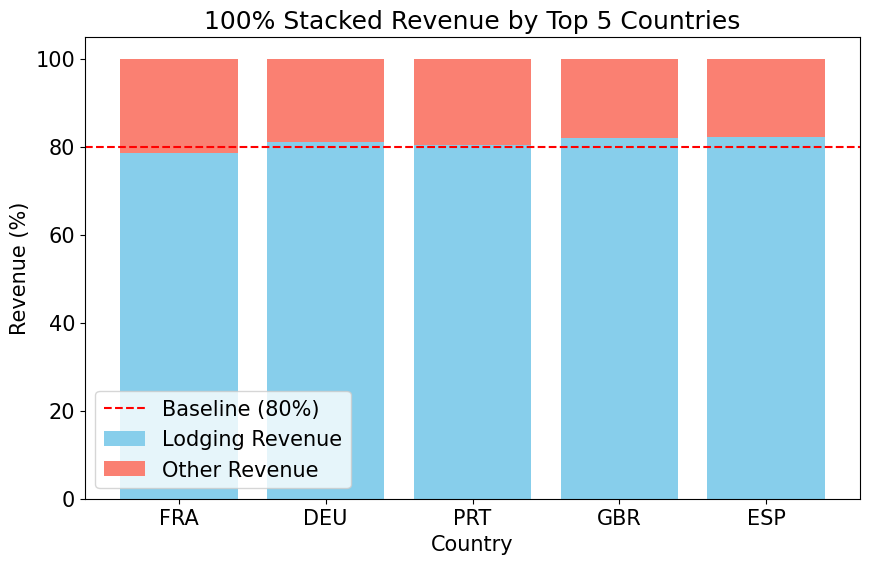

In [124]:
# Group the data by nationality and calculate the sum of LodgingRevenue and OtherRevenue
country_revenue = hotels.groupby('Nationality').agg({
    'LodgingRevenue': 'sum',
    'OtherRevenue': 'sum'
}).reset_index()

# Sort the data by total revenue (LodgingRevenue + OtherRevenue) in descending order and limit to 5 top results
top_5_countries=country_revenue.groupby('Nationality')[['LodgingRevenue', 'OtherRevenue']].sum().nlargest(5, 'LodgingRevenue')

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(top_5_countries))

plt.bar(index, top_5_countries['LodgingRevenue'], bar_width, label='Lodging Revenue', color='red')
plt.bar([i + bar_width for i in index], top_5_countries['OtherRevenue'], bar_width, label='Other Revenue', color='blue')

#Setting labels and titles with legend
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Grouped Bar Chart: Revenue Comparison by Top 5 Countries')
plt.xticks([i + bar_width/2 for i in index], top_5_countries.index)
plt.legend()
plt.tight_layout()

# Display the grouped bar chart
plt.show()

# Creating 100% stacked bar chart
plt.figure(figsize=(10, 6))
total_revenue = (top_5_countries['LodgingRevenue'] +top_5_countries['OtherRevenue'])

lodging_percentage = (top_5_countries['LodgingRevenue'] / total_revenue) * 100
other_percentage = (top_5_countries['OtherRevenue'] / total_revenue) * 100

plt.bar(top_5_countries.index, lodging_percentage, label='Lodging Revenue', color='skyblue')
plt.bar(top_5_countries.index, other_percentage, bottom=lodging_percentage, label='Other Revenue', color='salmon')

plt.xlabel('Country')
plt.ylabel('Revenue (%)')
plt.title('100% Stacked Revenue by Top 5 Countries')
plt.axhline(y=80, color='red', linestyle='--', label='Baseline (80%)')
plt.legend()
# Display the stacked bar chart with the reference line
plt.show()


# Task 6: Pie Charts

* Build a pie chart of LodgingRevenue by country. Include a slice for our top 5 countries and combine the rest into an 'other' Category.
* Then, convert the pie chart into a donut chart.

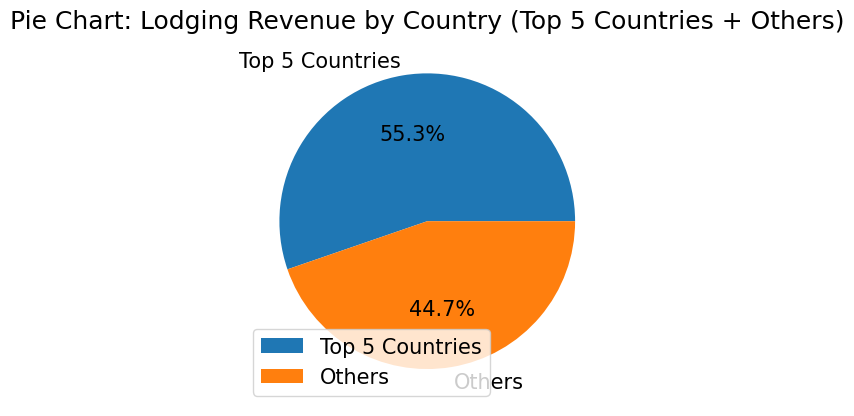

In [126]:
#Aggregating the lodging revenue after grouping by country
country_revenue = hotels.groupby("Nationality").agg({"LodgingRevenue":"sum"})
# Fetching the top 5 countries after sorting in descending order
top_5_countries_revenue =  country_revenue.sort_values(by=['LodgingRevenue'],ascending=False).head()
other_countries_revenue = country_revenue.sort_values(by=['LodgingRevenue'],ascending=False)[5:]

sizes = [np.sum(top_5_countries_revenue['LodgingRevenue']),np.sum(other_countries_revenue['LodgingRevenue'])]
# print(sizes)

labels = ['Top 5 Countries','Others']

#Creting pie chart, adding title and labels etc.
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%');
plt.title('Pie Chart: Lodging Revenue by Country (Top 5 Countries + Others)')
plt.legend(loc="lower left");


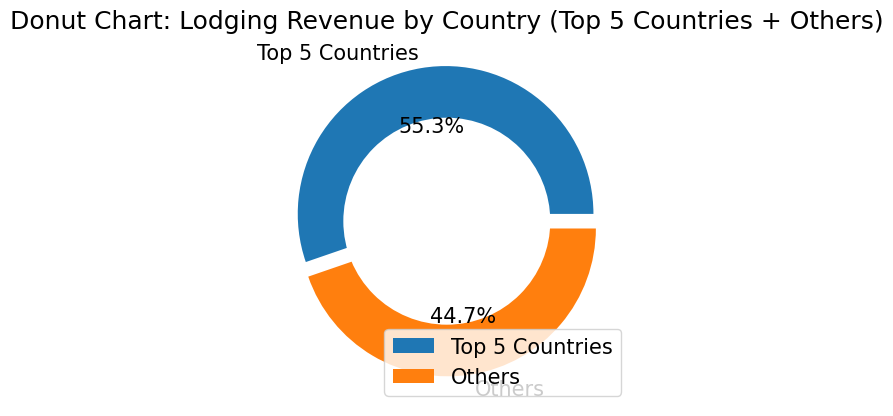

In [120]:
#Creating a Donut chart
plt.pie(sizes,labels=labels,autopct='%1.1f%%',explode=(0.05,0.05))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Donut Chart: Lodging Revenue by Country (Top 5 Countries + Others)')
plt.legend()
plt.show();

# task 7: Scatterplots & Histograms

* Build a scatterplot comparing average nights stayed by country to average revenue per customer by country.
* Then, build a bubble chart by specifying the size of the bubbles as the average nightly revenue.
* Finally, build a histogram comparing customer age in Germany to the Customer age in france.

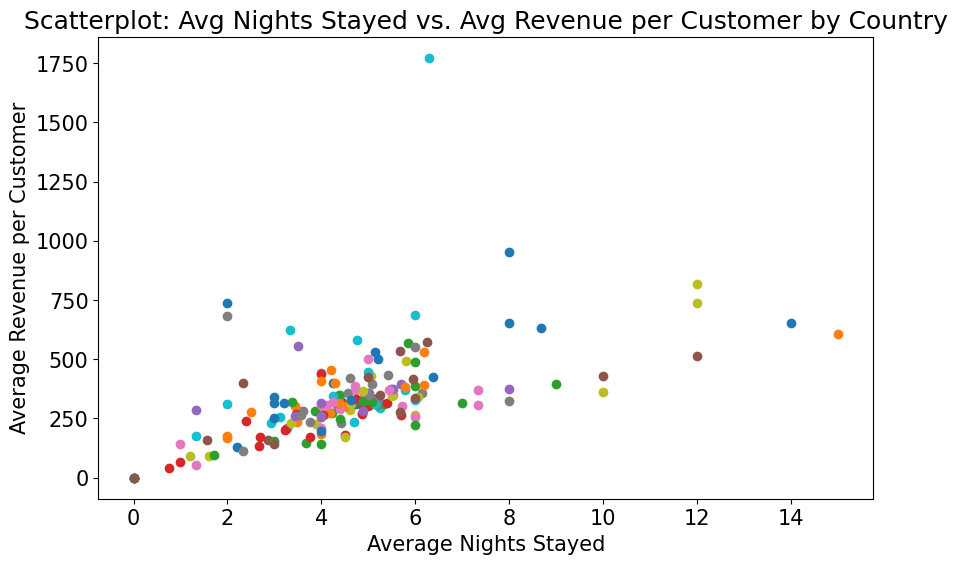

In [121]:
# Filter out rows with missing data in relevant columns
filtered_data = hotels.dropna(subset=['Nationality', 'AverageLeadTime', 'LodgingRevenue', 'Age'])

# Calculate average nights stayed and average revenue per customer by country
avg_nights_revenue_by_country = filtered_data.groupby('Nationality').agg(
    AvgNightsStayed=('PersonsNights', 'mean'),
    AvgRevenuePerCustomer=('LodgingRevenue', 'mean')
).reset_index()

# Create a scatterplot comparing average nights stayed to average revenue per customer
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(range(len(avg_nights_revenue_by_country['Nationality'].unique())))
for i, country in enumerate(avg_nights_revenue_by_country['Nationality'].unique()):
    country_data = avg_nights_revenue_by_country[avg_nights_revenue_by_country['Nationality'] == country]
    plt.scatter(country_data['AvgNightsStayed'], country_data['AvgRevenuePerCustomer'])

plt.title('Scatterplot: Avg Nights Stayed vs. Avg Revenue per Customer by Country')
plt.xlabel('Average Nights Stayed')
plt.ylabel('Average Revenue per Customer')
plt.show();

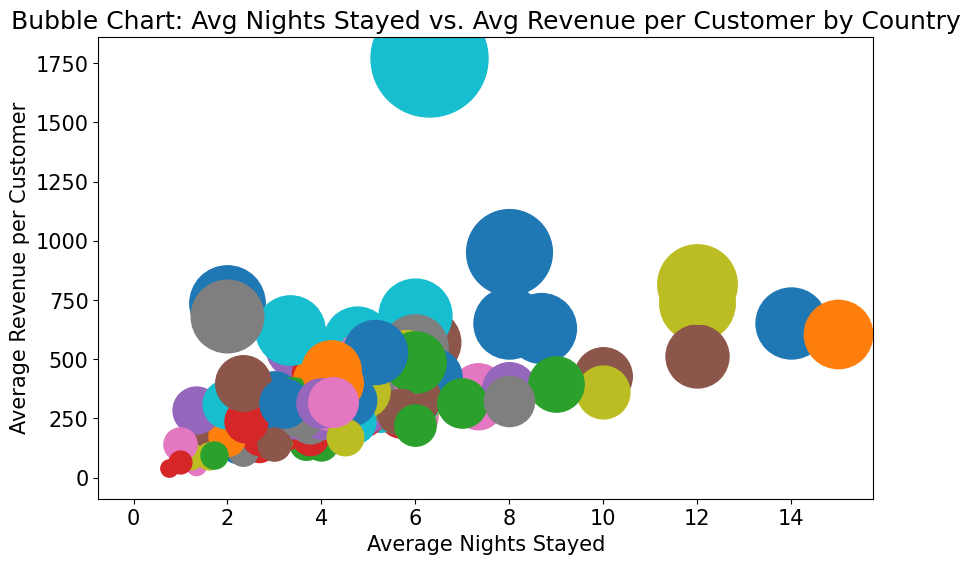

In [122]:
# Create a bubble chart with bubble size representing average nightly revenue
plt.figure(figsize=(10, 6))
for i, country in enumerate(avg_nights_revenue_by_country['Nationality'].unique()):
    country_data = avg_nights_revenue_by_country[avg_nights_revenue_by_country['Nationality'] == country]
    bubble_size = country_data['AvgRevenuePerCustomer'] * 4  # Adjust the multiplier for suitable bubble size
    plt.scatter(country_data['AvgNightsStayed'], country_data['AvgRevenuePerCustomer'], s=bubble_size)

plt.title('Bubble Chart: Avg Nights Stayed vs. Avg Revenue per Customer by Country')
plt.xlabel('Average Nights Stayed')
plt.ylabel('Average Revenue per Customer')
plt.show();

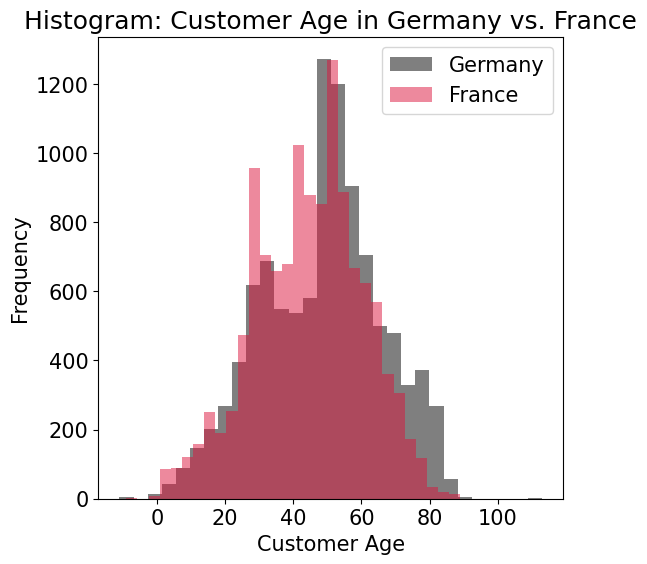

In [123]:
# Create a histogram comparing customer age in Germany to customer age in France
germany_age = filtered_data[filtered_data['Nationality'] == 'DEU']['Age']
france_age = filtered_data[filtered_data['Nationality'] == 'FRA']['Age']

plt.figure(figsize=(6, 6))
plt.hist(germany_age, color='black', label='Germany', bins=30, alpha=0.5)
plt.hist(france_age, color='crimson', label='France', bins=30, alpha=0.5)
plt.title('Histogram: Customer Age in Germany vs. France')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()